# Machine Learning with SKLearn
 Yazan Abughazaleh

### Reading Data with Pandas

The first step is to read in the Auto.csv file into a Pandas data frame.

In [23]:
import pandas as pd
df = pd.read_csv('Auto.csv')
print("Auto data: ")
df.head()


Auto data: 


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


Above we can see the first 5 rows of our data frame. Next we would like to check the dimensionality of our data.

In [24]:
print("DF dimensions: ",df.shape)

DF dimensions:  (392, 9)


The dimensions of the data frame indicate that there ar 392 instances with 9 attributes describing the instance.

### Data Exploration

The next step to perform is to learn about our data using the describe function.

In [25]:
print("Describe mpg, weight, and year: \n", df.loc[:,['mpg','weight','year']].describe())

Describe mpg, weight, and year: 
               mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000


Average for mpg: 23.446  
Range for mpg: 37.6  
Average for weight: 2977.584  
Range for weight: 3527  
Average for year: 76.010  
Range for year: 12.0  

### Exploring Data Types
 We now will explore the different data types used in the data frame. The first step is to check the data types of each column.

In [26]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

We can see the data types of each column displayed above. Now we would like to convert the cylinders and origin columns to factors.

In [27]:
df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')
df.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

We can see above that the data types were successfully converted. The next step is to deal with NA values.

### Dealing with NAs

We would like to ensure that our data has no NAs for training. We first check how many rows have NAs. If the count is low, we can safely remove the rows.

In [28]:
print("NAs:\n",df.isnull().sum())
df = df.dropna()
print("DF dimensions: ",df.shape)

NAs:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64
DF dimensions:  (389, 9)


The new dimensions of the data indicate that three NA values were removed. We can now continue on to the next step.

### Modifying Data

We are going to add a new column called "mpg_high" which is a categorical column that is based on the average mpg. Then, the "name" and "mpg" columns will be removed.

In [29]:
df['mpg_high'] = df['mpg'].mean()
df['mpg_high'] = pd.cut(df['mpg'],[0,df['mpg'].mean(),float('Inf')] ,labels=[0,1])
df = df.drop(columns=['mpg','name'])
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


Above, we can see that the data frame no longer has the "mpg" and "name" columns. Now we can try visual data exploration with Seaborn.

### Data Exploration With Graphs

To get started with data exploration using graphs, we first need to import the Seaborn package. We will then create a categorical plot of the "mpg_high" column.

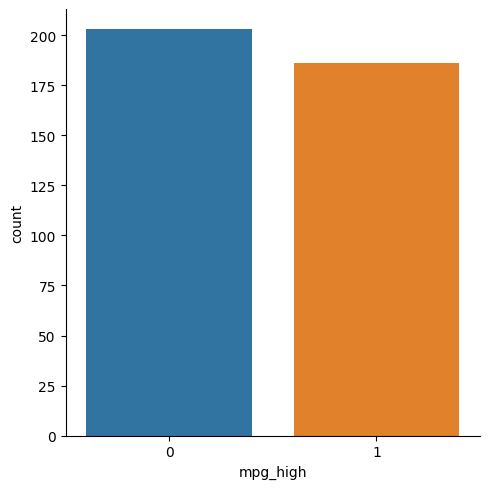

In [33]:
import seaborn as sb
sb.catplot(x="mpg_high",kind="count",data=df)

Next is a relational plot between between horsepower and weight.

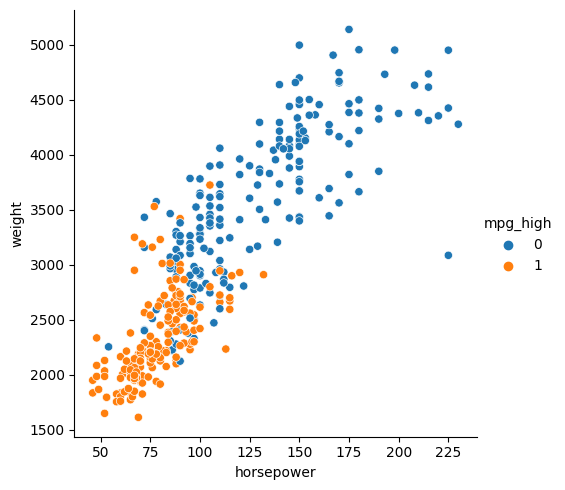

In [36]:
sb.relplot(x="horsepower",y="weight",data=df,hue=df.mpg_high)

The next plot is a box plot of mpg high and weight.

<Axes: xlabel='mpg_high', ylabel='weight'>

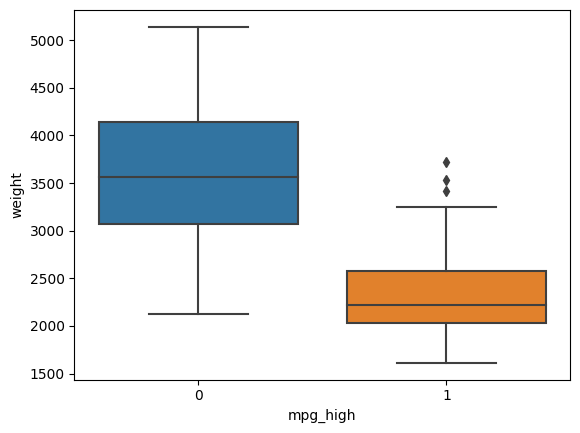

In [38]:
sb.boxplot(x="mpg_high",y="weight",data=df)

The first plot shows how many vehicles are in the low gas milage category and high gas mileage category. The second plot shows the relationship between the horsepower and weight of each vehicle, and the color is indicative of whether the gas milage is high or low. The trend shows that high gas milage vehicles typically have lower horsepower while low gas milage cars have higher horsepower. The last plot depicts the weights of the vehicls and their corresponding mpg classification.

### Train Test Data Split

The Auto data will now be split using an 80/20 split to create train and test data sets.

In [52]:

from sklearn.model_selection import train_test_split
X = df.iloc[:,0:6]
y = df.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=1234)
print("train size:", X_train.shape)
print("test size:", X_test.shape)


train size: (311, 6)
test size: (78, 6)


### Logistic Regression

We will now use logistic regression to predict the mpg_high column.


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(max_iter=150)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        50
           1       0.79      0.96      0.87        28

    accuracy                           0.90        78
   macro avg       0.89      0.91      0.89        78
weighted avg       0.91      0.90      0.90        78

[[43  7]
 [ 1 27]]


We can see the accuracy printed above is at 90% and we also have a printout of the confusion matrix showing how the type of classifications.

### Decision Trees

We will now use decision trees to perform the classification to compare the results with logistic regression.

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



[Text(0.6597222222222222, 0.9444444444444444, 'x[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4583333333333333, 0.8333333333333334, 'x[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.3055555555555556, 0.7222222222222222, 'x[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.16666666666666666, 0.6111111111111112, 'x[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.05555555555555555, 0.5, 'x[4] <= 13.75\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.05555555555555555, 0.2777777777777778, 'x[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.027777777777777776, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08333333333333333, 0.16666666666666666, 'x[3]

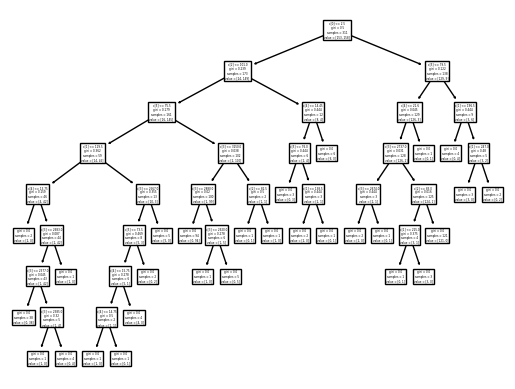

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)
pred = dct.predict(X_test)
print(classification_report(y_test, pred))
tree.plot_tree(dct)

The decision tree yielded a slight improvement in accuracy up to 92% over logistic regression.

### Neural Networks

The final algorithm we will look at in this notebook will be neural networks. We will attempt to perform classification with two different topologies of neural networks. Neural networks tend to work best with scaled data, so the first step we will take is scale our data to make it easier to work with.

In [67]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
scaler = preprocessing.StandardScaler().fit(X_train)
X_trainScale = scaler.transform(X_train)
X_testScale = scaler.transform(X_test)

nn1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, 2),
    max_iter=500, random_state=1234)
nn1.fit(X_trainScale,y_train)
pred = nn1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       0.81      0.93      0.87        28

    accuracy                           0.90        78
   macro avg       0.88      0.90      0.89        78
weighted avg       0.90      0.90      0.90        78



Above we can see the results of the neural network with a topology of 5 hidden nodes. The accuracy is at 90%. The quantity of nodes was picked using the 2/3 rule for hidden node count.
Next we will try the same process with a different topology.

In [73]:
nn2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7, 5),
    max_iter=1000, random_state=1234)
nn2.fit(X_trainScale,y_train)
pred = nn2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        50
           1       0.79      0.96      0.87        28

    accuracy                           0.90        78
   macro avg       0.89      0.91      0.89        78
weighted avg       0.91      0.90      0.90        78



Increasing the node count here did not boost the accuracy but instead boosted the precision of the model.


### Analysis
 When comparing a neural network, logistic regression, and a decision tree, the decision tree performed best on the Autos data set with the highest accuracy of 92%. Tied for the highest precision metric for the low gas milage category are the neural network and logistic regression models. The precision for the high milage category is best with the decision tree. The recall for the low gas milage is best with the decision tree and the high gas milage is best on the neural network and logistic regression models. The likely reason that the decision tree performed the best is because the data set is relatively small, and algorithms such as the neural network typically require lots of data to outperform simpler algorithms. Simpler algorithms tend to work better with small data sets, and this is the case with the decision tree. Lastly, the experience using Python and SKLearn has been much easier in my opinion than R. I found that the standardized formats for many of the models is easy to follow and did not require that I change up the data structure depending on the package. Python is also easier to use than the R for me because it is structured more like conventional programming languages.